In [24]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


In [25]:
mp_holistic=mp.solutions.holistic #Holistic model
mp_drawing=mp.solutions.drawing_utils #Drawing Utilities

In [26]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #color conversion to rgb
    image.flags.writeable=False #image is no longer writable
    results=model.process(image) #make prediction
    image.flags.writeable=True 
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results
    

In [27]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [28]:
def draw_stylized_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),#color landmarks
                             mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))#color connections
    
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [29]:
mp_holistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [8]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:#make media pipe model
    while cap.isOpened():
        
        ret,frame=cap.read()
        image,results=mediapipe_detection(frame,holistic)
        
        cv2.imshow('OpenCV Feed',frame)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [27]:
results

mediapipe.python.solution_base.SolutionOutputs

In [20]:
draw_landmarks(frame,results)

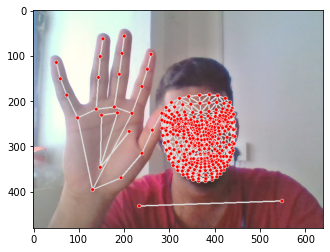

In [21]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [59]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:#make media pipe model
    while cap.isOpened():
        
        ret,frame=cap.read()
        image,results=mediapipe_detection(frame,holistic)
        
        draw_stylized_landmarks(image,results)
        
        cv2.imshow('OpenCV Feed',image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [26]:
len(results.left_hand_landmarks.landmark)

21

In [64]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

In [65]:
pose

array([ 4.02205795e-01,  8.66025150e-01, -2.08942413e+00,  9.99879599e-01,
        4.19012010e-01,  7.87301838e-01, -2.10866141e+00,  9.99849975e-01,
        4.35437590e-01,  7.78753519e-01, -2.10795379e+00,  9.99857008e-01,
        4.52095896e-01,  7.70328104e-01, -2.10801148e+00,  9.99833345e-01,
        3.58568490e-01,  8.00861418e-01, -2.12205648e+00,  9.99858916e-01,
        3.26246291e-01,  8.01015019e-01, -2.12186575e+00,  9.99841213e-01,
        2.97663450e-01,  7.98803031e-01, -2.12135553e+00,  9.99794304e-01,
        4.63059992e-01,  7.48101115e-01, -1.74002457e+00,  9.99875486e-01,
        2.51828611e-01,  7.87283242e-01, -1.78364730e+00,  9.99930322e-01,
        4.22052860e-01,  9.14195180e-01, -1.90463924e+00,  9.99673188e-01,
        3.65456820e-01,  9.30615127e-01, -1.91878223e+00,  9.99768138e-01,
        5.70393682e-01,  9.30054784e-01, -1.22467804e+00,  9.96343434e-01,
        1.28387347e-01,  9.67356145e-01, -1.17788196e+00,  9.87392724e-01,
        8.32537174e-01,  

In [68]:
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [69]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [48]:
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [49]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [31]:
DATA_PATH=os.path.join('MP_Data') #path for exported data( where data is stored )
actions=np.array(['Hello','Thanks','I Love You'])
#30 videos worth of data
no_sequences=30
#each video is to be 30 frames
sequence_length=30

In [32]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence))) #hello(0(30 frames),1(30),..29(30))
        except:
            pass
            

In [33]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    #make media pipe model
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                #read feed
                ret,frame=cap.read()
                
                #make detections
                image,results=mediapipe_detection(frame,holistic)
                
                draw_stylized_landmarks(image,results)
                
                #wait logic
                if frame_num==0:
                    cv2.putText(image,'Started Collecting Data',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    
                    #show to screen
                    cv2.imshow('OpenCV Feed',image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'Collecting frames for {} Video Number {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed',image)
                keypoints=extract_keypoints(results)
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
                
        
        
    cap.release()
    cv2.destroyAllWindows()

In [34]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [35]:
label_map={label:num for num,label in enumerate(actions)}

In [36]:
label_map

{'Hello': 0, 'Thanks': 1, 'I Love You': 2}

In [37]:
sequences,labels=[],[] 
#features(x),label(y)
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [38]:
np.array(sequences).shape #90 videos each frames has 1662 keypoints

(90, 30, 1662)

In [39]:
X=np.array(sequences)
y=to_categorical(labels).astype(int)

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard
#less parameter in lstm

In [42]:
# log_dir=os.path.join('Logs')
# tb_callback=TensorBoard(log_dir=log_dir)

In [43]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662))) #64 lstm units,True for next layer,Rectified Linear
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax')) # soft max return values with whole sum equals 1

In [44]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
#replacement for grdient descent

In [45]:
model.fit(X_train,y_train,epochs=2000)

Epoch 1/2000
3/3 [==============================] - 3s 71ms/step - loss: 3.8016 - categorical_accuracy: 0.3765
Epoch 2/2000
3/3 [==============================] - 0s 56ms/step - loss: 11.8545 - categorical_accuracy: 0.3529
Epoch 3/2000
3/3 [==============================] - 0s 56ms/step - loss: 37.1121 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 62ms/step - loss: 52.8442 - categorical_accuracy: 0.2941
Epoch 5/2000
3/3 [==============================] - 0s 60ms/step - loss: 54.8129 - categorical_accuracy: 0.3412
Epoch 6/2000
3/3 [==============================] - 0s 64ms/step - loss: 35.2135 - categorical_accuracy: 0.3529
Epoch 7/2000
3/3 [==============================] - 0s 55ms/step - loss: 57.2187 - categorical_accuracy: 0.3647
Epoch 8/2000
3/3 [==============================] - 0s 54ms/step - loss: 217.6514 - categorical_accuracy: 0.3412
Epoch 9/2000
3/3 [==============================] - 0s 57ms/step - loss: 361.7047 - categorical_accuracy

3/3 [==============================] - 0s 59ms/step - loss: 33.1858 - categorical_accuracy: 0.3647
Epoch 74/2000
3/3 [==============================] - 0s 54ms/step - loss: 64.2106 - categorical_accuracy: 0.3765
Epoch 75/2000
3/3 [==============================] - 0s 64ms/step - loss: 68.9116 - categorical_accuracy: 0.3647
Epoch 76/2000
3/3 [==============================] - 0s 56ms/step - loss: 68.0816 - categorical_accuracy: 0.4000
Epoch 77/2000
3/3 [==============================] - 0s 57ms/step - loss: 54.1739 - categorical_accuracy: 0.3412
Epoch 78/2000
3/3 [==============================] - 0s 77ms/step - loss: 123.8005 - categorical_accuracy: 0.2824
Epoch 79/2000
3/3 [==============================] - 0s 58ms/step - loss: 88.1132 - categorical_accuracy: 0.3412
Epoch 80/2000
3/3 [==============================] - 0s 53ms/step - loss: 143.0723 - categorical_accuracy: 0.3294
Epoch 81/2000
3/3 [==============================] - 0s 56ms/step - loss: 115.4434 - categorical_accuracy: 0

3/3 [==============================] - 0s 72ms/step - loss: 55.0998 - categorical_accuracy: 0.3765
Epoch 146/2000
3/3 [==============================] - 0s 57ms/step - loss: 135.4915 - categorical_accuracy: 0.4118
Epoch 147/2000
3/3 [==============================] - 0s 61ms/step - loss: 106.0808 - categorical_accuracy: 0.4118
Epoch 148/2000
3/3 [==============================] - 0s 60ms/step - loss: 51.8642 - categorical_accuracy: 0.3176
Epoch 149/2000
3/3 [==============================] - 0s 62ms/step - loss: 41.1723 - categorical_accuracy: 0.2824
Epoch 150/2000
3/3 [==============================] - 0s 60ms/step - loss: 19.1695 - categorical_accuracy: 0.4118
Epoch 151/2000
3/3 [==============================] - 0s 57ms/step - loss: 14.0248 - categorical_accuracy: 0.3176
Epoch 152/2000
3/3 [==============================] - 0s 52ms/step - loss: 27.6180 - categorical_accuracy: 0.3882
Epoch 153/2000
3/3 [==============================] - 0s 56ms/step - loss: 41.7127 - categorical_accu

3/3 [==============================] - 0s 64ms/step - loss: 33.2834 - categorical_accuracy: 0.3765
Epoch 217/2000
3/3 [==============================] - 0s 56ms/step - loss: 79.9849 - categorical_accuracy: 0.3294
Epoch 218/2000
3/3 [==============================] - 0s 56ms/step - loss: 29.1266 - categorical_accuracy: 0.3529
Epoch 219/2000
3/3 [==============================] - 0s 61ms/step - loss: 26.1120 - categorical_accuracy: 0.3176
Epoch 220/2000
3/3 [==============================] - 0s 53ms/step - loss: 19.9849 - categorical_accuracy: 0.3647
Epoch 221/2000
3/3 [==============================] - 0s 61ms/step - loss: 23.0948 - categorical_accuracy: 0.4118
Epoch 222/2000
3/3 [==============================] - 0s 60ms/step - loss: 20.5448 - categorical_accuracy: 0.2941
Epoch 223/2000
3/3 [==============================] - 0s 68ms/step - loss: 24.2970 - categorical_accuracy: 0.3412
Epoch 224/2000
3/3 [==============================] - 0s 56ms/step - loss: 8.3110 - categorical_accurac

3/3 [==============================] - 0s 62ms/step - loss: 9.5941 - categorical_accuracy: 0.4706
Epoch 289/2000
3/3 [==============================] - 0s 60ms/step - loss: 13.2127 - categorical_accuracy: 0.3412
Epoch 290/2000
3/3 [==============================] - 0s 56ms/step - loss: 10.6796 - categorical_accuracy: 0.3765
Epoch 291/2000
3/3 [==============================] - 0s 62ms/step - loss: 17.9024 - categorical_accuracy: 0.2824
Epoch 292/2000
3/3 [==============================] - 0s 53ms/step - loss: 8.8166 - categorical_accuracy: 0.3529
Epoch 293/2000
3/3 [==============================] - 0s 59ms/step - loss: 32.1712 - categorical_accuracy: 0.3294
Epoch 294/2000
3/3 [==============================] - 0s 65ms/step - loss: 15.2709 - categorical_accuracy: 0.3882
Epoch 295/2000
3/3 [==============================] - 0s 60ms/step - loss: 20.4579 - categorical_accuracy: 0.3529
Epoch 296/2000
3/3 [==============================] - 0s 58ms/step - loss: 31.3577 - categorical_accuracy

3/3 [==============================] - 0s 56ms/step - loss: 43.5024 - categorical_accuracy: 0.5529
Epoch 360/2000
3/3 [==============================] - 0s 69ms/step - loss: 38.6332 - categorical_accuracy: 0.5647
Epoch 361/2000
3/3 [==============================] - 0s 56ms/step - loss: 16.0869 - categorical_accuracy: 0.3412
Epoch 362/2000
3/3 [==============================] - 0s 74ms/step - loss: 9.1351 - categorical_accuracy: 0.5529
Epoch 363/2000
3/3 [==============================] - 0s 52ms/step - loss: 28.3769 - categorical_accuracy: 0.3176
Epoch 364/2000
3/3 [==============================] - 0s 66ms/step - loss: 22.5260 - categorical_accuracy: 0.3412
Epoch 365/2000
3/3 [==============================] - 0s 60ms/step - loss: 17.4778 - categorical_accuracy: 0.4118
Epoch 366/2000
3/3 [==============================] - 0s 67ms/step - loss: 24.0293 - categorical_accuracy: 0.5294
Epoch 367/2000
3/3 [==============================] - 0s 62ms/step - loss: 24.3241 - categorical_accurac

3/3 [==============================] - 0s 63ms/step - loss: 23.6391 - categorical_accuracy: 0.3294
Epoch 432/2000
3/3 [==============================] - 0s 62ms/step - loss: 13.7720 - categorical_accuracy: 0.3882
Epoch 433/2000
3/3 [==============================] - 0s 54ms/step - loss: 32.5743 - categorical_accuracy: 0.3412
Epoch 434/2000
3/3 [==============================] - 0s 60ms/step - loss: 24.1603 - categorical_accuracy: 0.3882
Epoch 435/2000
3/3 [==============================] - 0s 57ms/step - loss: 35.6388 - categorical_accuracy: 0.3412
Epoch 436/2000
3/3 [==============================] - 0s 64ms/step - loss: 24.1677 - categorical_accuracy: 0.2941
Epoch 437/2000
3/3 [==============================] - 0s 57ms/step - loss: 20.0711 - categorical_accuracy: 0.3412
Epoch 438/2000
3/3 [==============================] - 0s 57ms/step - loss: 32.4389 - categorical_accuracy: 0.4588
Epoch 439/2000
3/3 [==============================] - 0s 56ms/step - loss: 20.8614 - categorical_accura

3/3 [==============================] - 0s 64ms/step - loss: 27.3919 - categorical_accuracy: 0.2941
Epoch 504/2000
3/3 [==============================] - 0s 60ms/step - loss: 26.3463 - categorical_accuracy: 0.4000
Epoch 505/2000
3/3 [==============================] - 0s 60ms/step - loss: 16.8828 - categorical_accuracy: 0.4941
Epoch 506/2000
3/3 [==============================] - 0s 63ms/step - loss: 20.8254 - categorical_accuracy: 0.3765
Epoch 507/2000
3/3 [==============================] - 0s 55ms/step - loss: 8.8832 - categorical_accuracy: 0.4824
Epoch 508/2000
3/3 [==============================] - 0s 67ms/step - loss: 19.7937 - categorical_accuracy: 0.3176
Epoch 509/2000
3/3 [==============================] - 0s 58ms/step - loss: 30.2754 - categorical_accuracy: 0.4824
Epoch 510/2000
3/3 [==============================] - 0s 53ms/step - loss: 15.9430 - categorical_accuracy: 0.5176
Epoch 511/2000
3/3 [==============================] - 0s 59ms/step - loss: 17.8331 - categorical_accurac

3/3 [==============================] - 0s 57ms/step - loss: 11.0399 - categorical_accuracy: 0.4588
Epoch 576/2000
3/3 [==============================] - 0s 60ms/step - loss: 18.8850 - categorical_accuracy: 0.3176
Epoch 577/2000
3/3 [==============================] - 0s 56ms/step - loss: 19.2503 - categorical_accuracy: 0.4941
Epoch 578/2000
3/3 [==============================] - 0s 60ms/step - loss: 17.3278 - categorical_accuracy: 0.4471
Epoch 579/2000
3/3 [==============================] - 0s 67ms/step - loss: 24.6171 - categorical_accuracy: 0.3765
Epoch 580/2000
3/3 [==============================] - 0s 57ms/step - loss: 36.3911 - categorical_accuracy: 0.5176
Epoch 581/2000
3/3 [==============================] - 0s 61ms/step - loss: 21.6177 - categorical_accuracy: 0.5765
Epoch 582/2000
3/3 [==============================] - 0s 56ms/step - loss: 45.4372 - categorical_accuracy: 0.3294
Epoch 583/2000
3/3 [==============================] - 0s 63ms/step - loss: 13.4487 - categorical_accura

3/3 [==============================] - 0s 59ms/step - loss: 7.3014 - categorical_accuracy: 0.5765
Epoch 648/2000
3/3 [==============================] - 0s 65ms/step - loss: 3.5822 - categorical_accuracy: 0.5882
Epoch 649/2000
3/3 [==============================] - 0s 60ms/step - loss: 5.2822 - categorical_accuracy: 0.5059
Epoch 650/2000
3/3 [==============================] - 0s 62ms/step - loss: 4.0775 - categorical_accuracy: 0.5529
Epoch 651/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.1919 - categorical_accuracy: 0.5765
Epoch 652/2000
3/3 [==============================] - 0s 67ms/step - loss: 4.5467 - categorical_accuracy: 0.6118
Epoch 653/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.9740 - categorical_accuracy: 0.6000
Epoch 654/2000
3/3 [==============================] - 0s 54ms/step - loss: 6.1029 - categorical_accuracy: 0.6353
Epoch 655/2000
3/3 [==============================] - 0s 60ms/step - loss: 3.4750 - categorical_accuracy: 0.647

3/3 [==============================] - 0s 60ms/step - loss: 19.2331 - categorical_accuracy: 0.3176
Epoch 720/2000
3/3 [==============================] - 0s 56ms/step - loss: 27.7199 - categorical_accuracy: 0.3647
Epoch 721/2000
3/3 [==============================] - 0s 63ms/step - loss: 20.1390 - categorical_accuracy: 0.3294
Epoch 722/2000
3/3 [==============================] - 0s 63ms/step - loss: 23.4214 - categorical_accuracy: 0.4000
Epoch 723/2000
3/3 [==============================] - 0s 61ms/step - loss: 26.3826 - categorical_accuracy: 0.3529
Epoch 724/2000
3/3 [==============================] - 0s 56ms/step - loss: 16.8463 - categorical_accuracy: 0.3412
Epoch 725/2000
3/3 [==============================] - 0s 57ms/step - loss: 21.5823 - categorical_accuracy: 0.3882
Epoch 726/2000
3/3 [==============================] - 0s 62ms/step - loss: 5.9852 - categorical_accuracy: 0.4588
Epoch 727/2000
3/3 [==============================] - 0s 56ms/step - loss: 113.8802 - categorical_accura

3/3 [==============================] - 0s 60ms/step - loss: 1.6024 - categorical_accuracy: 0.3882
Epoch 792/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1289 - categorical_accuracy: 0.4706
Epoch 793/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.5737 - categorical_accuracy: 0.3647
Epoch 794/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.3755 - categorical_accuracy: 0.4471
Epoch 795/2000
3/3 [==============================] - 0s 64ms/step - loss: 2.6899 - categorical_accuracy: 0.4000
Epoch 796/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.1642 - categorical_accuracy: 0.4000
Epoch 797/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.9117 - categorical_accuracy: 0.3176
Epoch 798/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.1014 - categorical_accuracy: 0.4941
Epoch 799/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.2605 - categorical_accuracy: 0.352

3/3 [==============================] - 0s 61ms/step - loss: 1.1507 - categorical_accuracy: 0.4941
Epoch 864/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.9894 - categorical_accuracy: 0.5765
Epoch 865/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.4739 - categorical_accuracy: 0.4706
Epoch 866/2000
3/3 [==============================] - 0s 62ms/step - loss: 2.5471 - categorical_accuracy: 0.5765
Epoch 867/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.2624 - categorical_accuracy: 0.3765
Epoch 868/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0324 - categorical_accuracy: 0.5294
Epoch 869/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.2150 - categorical_accuracy: 0.4824
Epoch 870/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0641 - categorical_accuracy: 0.5412
Epoch 871/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.9137 - categorical_accuracy: 0.576

3/3 [==============================] - 0s 56ms/step - loss: 2.7364 - categorical_accuracy: 0.5882
Epoch 936/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.3929 - categorical_accuracy: 0.5765
Epoch 937/2000
3/3 [==============================] - 0s 64ms/step - loss: 2.3000 - categorical_accuracy: 0.6000
Epoch 938/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.6075 - categorical_accuracy: 0.5294
Epoch 939/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.6605 - categorical_accuracy: 0.6000
Epoch 940/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.9475 - categorical_accuracy: 0.5412
Epoch 941/2000
3/3 [==============================] - 0s 61ms/step - loss: 2.2874 - categorical_accuracy: 0.6118
Epoch 942/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.8390 - categorical_accuracy: 0.5176 0s - loss: 2.0772 - categorical_accuracy: 0.
Epoch 943/2000
3/3 [==============================] - 0s 67ms/step

3/3 [==============================] - 0s 59ms/step - loss: 1.3812 - categorical_accuracy: 0.5176
Epoch 1008/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0843 - categorical_accuracy: 0.5647
Epoch 1009/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.7637 - categorical_accuracy: 0.6824
Epoch 1010/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0275 - categorical_accuracy: 0.5765
Epoch 1011/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.6940 - categorical_accuracy: 0.7176
Epoch 1012/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.9114 - categorical_accuracy: 0.6471
Epoch 1013/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.7190 - categorical_accuracy: 0.6824
Epoch 1014/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.9557 - categorical_accuracy: 0.6118
Epoch 1015/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.8814 - categorical_accurac

3/3 [==============================] - 0s 59ms/step - loss: 1.2624 - categorical_accuracy: 0.5882
Epoch 1080/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.4024 - categorical_accuracy: 0.6118
Epoch 1081/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.2820 - categorical_accuracy: 0.5412
Epoch 1082/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.6114 - categorical_accuracy: 0.5059
Epoch 1083/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.5071 - categorical_accuracy: 0.6588
Epoch 1084/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.7573 - categorical_accuracy: 0.4941
Epoch 1085/2000
3/3 [==============================] - 0s 63ms/step - loss: 2.5589 - categorical_accuracy: 0.6706
Epoch 1086/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.3792 - categorical_accuracy: 0.5059
Epoch 1087/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.8509 - categorical_accurac

3/3 [==============================] - 0s 82ms/step - loss: 1.2159 - categorical_accuracy: 0.6000
Epoch 1151/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.5593 - categorical_accuracy: 0.4824
Epoch 1152/2000
3/3 [==============================] - 0s 61ms/step - loss: 2.7042 - categorical_accuracy: 0.6118
Epoch 1153/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.9136 - categorical_accuracy: 0.5059
Epoch 1154/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.8732 - categorical_accuracy: 0.6235
Epoch 1155/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.4796 - categorical_accuracy: 0.4941
Epoch 1156/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.6782 - categorical_accuracy: 0.6941
Epoch 1157/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.6213 - categorical_accuracy: 0.7765
Epoch 1158/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.9431 - categorical_accurac

3/3 [==============================] - 0s 86ms/step - loss: 1.0930 - categorical_accuracy: 0.6588
Epoch 1223/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.6339 - categorical_accuracy: 0.7529
Epoch 1224/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.2582 - categorical_accuracy: 0.5529
Epoch 1225/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.7752 - categorical_accuracy: 0.7412
Epoch 1226/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.7282 - categorical_accuracy: 0.6588
Epoch 1227/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.9532 - categorical_accuracy: 0.6706
Epoch 1228/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.7940 - categorical_accuracy: 0.7294
Epoch 1229/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.1073 - categorical_accuracy: 0.4588
Epoch 1230/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.0287 - categorical_accurac

3/3 [==============================] - 0s 57ms/step - loss: 0.6657 - categorical_accuracy: 0.6941
Epoch 1295/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.7583 - categorical_accuracy: 0.7176
Epoch 1296/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.4462 - categorical_accuracy: 0.6588
Epoch 1297/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.2817 - categorical_accuracy: 0.5882
Epoch 1298/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.2900 - categorical_accuracy: 0.4471
Epoch 1299/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.6481 - categorical_accuracy: 0.5882
Epoch 1300/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.1393 - categorical_accuracy: 0.4353
Epoch 1301/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.9217 - categorical_accuracy: 0.6118
Epoch 1302/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.9075 - categorical_accurac

3/3 [==============================] - 0s 60ms/step - loss: 1.0858 - categorical_accuracy: 0.6000
Epoch 1367/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.3285 - categorical_accuracy: 0.6235
Epoch 1368/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.4200 - categorical_accuracy: 0.5412
Epoch 1369/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.8717 - categorical_accuracy: 0.6706
Epoch 1370/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0814 - categorical_accuracy: 0.6471
Epoch 1371/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.7071 - categorical_accuracy: 0.7412
Epoch 1372/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.7805 - categorical_accuracy: 0.6824
Epoch 1373/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1585 - categorical_accuracy: 0.5882
Epoch 1374/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.7363 - categorical_accurac

3/3 [==============================] - 0s 63ms/step - loss: 0.9116 - categorical_accuracy: 0.6824
Epoch 1439/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.8282 - categorical_accuracy: 0.6588
Epoch 1440/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.9794 - categorical_accuracy: 0.6588
Epoch 1441/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.9505 - categorical_accuracy: 0.6471
Epoch 1442/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.8599 - categorical_accuracy: 0.7059
Epoch 1443/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.7500 - categorical_accuracy: 0.6235
Epoch 1444/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.6499 - categorical_accuracy: 0.7412
Epoch 1445/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.5997 - categorical_accuracy: 0.8118
Epoch 1446/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.5360 - categorical_accurac

3/3 [==============================] - 0s 65ms/step - loss: 0.6803 - categorical_accuracy: 0.7176
Epoch 1511/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.4761 - categorical_accuracy: 0.8000
Epoch 1512/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4680 - categorical_accuracy: 0.8824
Epoch 1513/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.5385 - categorical_accuracy: 0.8118
Epoch 1514/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4376 - categorical_accuracy: 0.8706
Epoch 1515/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.4705 - categorical_accuracy: 0.8471
Epoch 1516/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.7579 - categorical_accuracy: 0.7294
Epoch 1517/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0445 - categorical_accuracy: 0.6941
Epoch 1518/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.8037 - categorical_accurac

3/3 [==============================] - 0s 60ms/step - loss: 0.3439 - categorical_accuracy: 0.8706
Epoch 1582/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.3965 - categorical_accuracy: 0.8235
Epoch 1583/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4434 - categorical_accuracy: 0.8235
Epoch 1584/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.6981 - categorical_accuracy: 0.7647
Epoch 1585/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0156 - categorical_accuracy: 0.6588
Epoch 1586/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.2204 - categorical_accuracy: 0.5765
Epoch 1587/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.9903 - categorical_accuracy: 0.7059
Epoch 1588/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.4809 - categorical_accuracy: 0.6588
Epoch 1589/2000
3/3 [==============================] - 0s 63ms/step - loss: 3.4923 - categorical_accurac

3/3 [==============================] - 0s 58ms/step - loss: 0.4710 - categorical_accuracy: 0.7882
Epoch 1654/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4446 - categorical_accuracy: 0.8353
Epoch 1655/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.5611 - categorical_accuracy: 0.7529
Epoch 1656/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.3734 - categorical_accuracy: 0.8471
Epoch 1657/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.6320 - categorical_accuracy: 0.7765
Epoch 1658/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.5958 - categorical_accuracy: 0.8588
Epoch 1659/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.9103 - categorical_accuracy: 0.7412
Epoch 1660/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.9967 - categorical_accuracy: 0.6706
Epoch 1661/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.3981 - categorical_accurac

3/3 [==============================] - 0s 60ms/step - loss: 1.1148 - categorical_accuracy: 0.6824
Epoch 1726/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.8989 - categorical_accuracy: 0.6353
Epoch 1727/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.9021 - categorical_accuracy: 0.6941
Epoch 1728/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.2775 - categorical_accuracy: 0.5882
Epoch 1729/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.2426 - categorical_accuracy: 0.4706
Epoch 1730/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.6248 - categorical_accuracy: 0.6824
Epoch 1731/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.5392 - categorical_accuracy: 0.7765
Epoch 1732/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.7722 - categorical_accuracy: 0.6471
Epoch 1733/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1532 - categorical_accurac

3/3 [==============================] - 0s 60ms/step - loss: 0.4581 - categorical_accuracy: 0.8471
Epoch 1798/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.6715 - categorical_accuracy: 0.7882
Epoch 1799/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4935 - categorical_accuracy: 0.7882
Epoch 1800/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.7210 - categorical_accuracy: 0.7882
Epoch 1801/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.8118 - categorical_accuracy: 0.7176
Epoch 1802/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.6854 - categorical_accuracy: 0.7647
Epoch 1803/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.9422 - categorical_accuracy: 0.7294
Epoch 1804/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.7835 - categorical_accuracy: 0.7529
Epoch 1805/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0366 - categorical_accurac

3/3 [==============================] - 0s 64ms/step - loss: 0.6269 - categorical_accuracy: 0.7882
Epoch 1870/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.6262 - categorical_accuracy: 0.7765
Epoch 1871/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.4510 - categorical_accuracy: 0.8235
Epoch 1872/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4193 - categorical_accuracy: 0.8824
Epoch 1873/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.8814 - categorical_accuracy: 0.7529
Epoch 1874/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0902 - categorical_accuracy: 0.6588
Epoch 1875/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.7668 - categorical_accuracy: 0.7647
Epoch 1876/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1791 - categorical_accuracy: 0.6471
Epoch 1877/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.2832 - categorical_accurac

3/3 [==============================] - 0s 68ms/step - loss: 1.6550 - categorical_accuracy: 0.6353
Epoch 1942/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.5913 - categorical_accuracy: 0.5059
Epoch 1943/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.8559 - categorical_accuracy: 0.7529
Epoch 1944/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.7093 - categorical_accuracy: 0.7882
Epoch 1945/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.6548 - categorical_accuracy: 0.8000
Epoch 1946/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.4788 - categorical_accuracy: 0.6000
Epoch 1947/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.5180 - categorical_accuracy: 0.4824
Epoch 1948/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.9572 - categorical_accuracy: 0.7176
Epoch 1949/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0258 - categorical_accurac

In [46]:
res=model.predict(X_test)

In [47]:
actions[np.argmax(res[2])]

'Hello'

In [48]:
actions[np.argmax(y_test[2])]

'I Love You'

In [49]:
model.save('action.h5')
#store in multidimenetional array format

In [50]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [51]:
y_pre=model.predict(X_test)

In [52]:
y_org=np.argmax(y_test,axis=1).tolist()
y_pre=np.argmax(y_pre,axis=1).tolist()

In [53]:
multilabel_confusion_matrix(y_org,y_pre)

array([[[3, 1],
        [0, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 0],
        [1, 1]]], dtype=int64)

In [54]:
y_org

[1, 1, 2, 2, 0]

In [55]:
accuracy_score(y_org,y_pre)

0.8

In [57]:
sequence=[]
sentence=[]
threshold=0.50
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:#make media pipe model
    while cap.isOpened():
        
        ret,frame=cap.read()
        image,results=mediapipe_detection(frame,holistic)
        
        draw_stylized_landmarks(image,results)
        
        keypoint=extract_keypoints(results)
        sequence.append(keypoint)
        sequence=sequence[-30:]
        
        if(len(sequence)==30):
            res=model.predict(np.expand_dims(sequence,axis=0))[0]
            print(actions[np.argmax(res)])
            
        if res[np.argmax(res)] > threshold:
            if len(sentence)>0:
                if(actions[np.argmax(res)]!=sentence[-1]):
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])
                
        if(len(sentence)>4):
            sentence=sentence[-4:]
        cv2.rectangle(image,(0,0),(640,40),(245,117,16),-1)
        cv2.putText(image,' '.join(sentence),(3,30),
                   cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)

                    
        
        cv2.imshow('OpenCV Feed',image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I Love You
I Love You
Hello
Hello
I Love You
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
I Love You
I Love You
I Love You
I Love You
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
I Love You
I Love You
I Love You
I Love You
I Love You
I Love You
Hello
I Love You
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
I Love You
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
I Love You
I Love You
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
I Love You
I Love You
I Love You
I Love You
I Love You
I Love You
I Love You
I Love You
I Love You
I Love You
I Love You
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hell

In [112]:
res[np.argmax(res)]


0.9999094

In [58]:
sequence=[]
threshold=0.50
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:#make media pipe model
    while cap.isOpened():
        
        ret,frame=cap.read()
        image,results=mediapipe_detection(frame,holistic)
        
        draw_stylized_landmarks(image,results)
        
        keypoint=extract_keypoints(results)
        sequence.append(keypoint)
        sequence=sequence[-30:]
        
        if(len(sequence)==30):
            res=model.predict(np.expand_dims(sequence,axis=0))[0]
            print(actions[np.argmax(res)])
            

                    
        
        cv2.imshow('OpenCV Feed',image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
I Love You
I Love You
I Love You
I Love You
I Love You
I Love You
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
I Love You
I Love You
Thanks
Thanks
Thanks
Thanks
Thanks
I Love You
Thanks
Thanks
Thanks
Thanks
Thanks
I Love You
I Love You
I Love You
I Love You
I Love You
I Love You
Hello
Hello
Hello
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
I Love You
I Love You
I Love You
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Thanks
Thanks
Thanks
Thanks
Thanks
Thanks
I Love You
I Love You
I Love You
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
I Love You
Thanks
Thanks
Thanks
I Love You
I Love You


In [ ]:
0.7,0,2,0.1